# Problem Session 4
## More Regression

The problems in this notebook will cover the content covered in our `Regression` lectures including:
- `Simple Linear Regression`,
- `A First Predictive Modeling Project`,
- `Multiple Linear Regression` and
- `Categorical Variables and Interactions`.

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### 1. Preparing the data

In this notebook you will continue to model the ultimate selling price of various vechicles. First we have to load the data and repeat some of the cleaning we did in `Problem Session 3`.

##### a.

- Load the `car_sales.csv` data set again
- Remove the missing values
- Create the `log_sell` and `log_km` columns
- Clean the `mileage`, `engine` and `max_power` columns with `clean_column` and
- Create the `age` column.

In [2]:
def clean_column(text):
    return float(text.split()[0])

##### Sample Solution

In [3]:
cars = pd.read_csv("../../Data/car_sales.csv")

cars.dropna(inplace=True)

In [4]:
cars['mileage'] = cars['mileage'].apply(clean_column)
cars['engine'] = cars['engine'].apply(clean_column)
cars['max_power'] = cars['max_power'].apply(clean_column)
cars['age'] = 2020 - cars['year']
cars['log_sell'] = np.log10(cars['selling_price'])
cars['log_km'] = np.log10(cars['km_driven'])

##### b.

Make the train test split using `sklearn`'s `train_test_split`.

##### Sample Solution

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
cars_train, cars_test = train_test_split(cars.copy(),
                                            test_size=.2,
                                            random_state=440,
                                            shuffle=True)

##### c.

If you need to, take a moment to refresh yourself on these data.

##### Sample Solution

In [7]:
cars_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,log_sell,log_km
1908,Honda Civic 1.8 V AT,2009,280000,40000.0,Petrol,Individual,Automatic,Third Owner,12.9,1799.0,130.0,172Nm@ 4300rpm,5.0,11,5.447158,4.602060
2848,Maruti Ritz VXI,2010,320000,60000.0,Petrol,Individual,Manual,Second Owner,21.1,1197.0,85.8,114Nm@ 4000rpm,5.0,10,5.505150,4.778151


##### d.

Here is a variable summary for your convenience.

<u>Outcome Variable</u>
- `selling_price` or `log_sell` (you will use `log_sell` in your models)

<u>Continuous Features</u>
- `km_driven` and thus `log_km`
- `mileage`
- `engine`
- `max_power`
- `seats`
- `age`

<u>Categorical Features</u>
- `fuel`
- `seller_type`
- `transmission`
- `owner`

You will ignore `torque` because it would require more cleaning than we will spend time on in these problem sessions.

#### 2. More EDA

In `Problem Session 3` you examined potential linear relationships with `log_sell` and:
- `log_km`,
- `mileage` and
- `age`.

In this notebook you will examine potential effects of the various categorical variables listed above.

##### a. 

One way to examine if a cateorical variable has an impact on an outcome variable is to compare the mean or median of the outcome variable among the different categories.

Use `pandas` `groupby`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html</a>, to examine the mean or median of `log_sell` by the four categorical features listed above.

##### Sample Solution

In [8]:
print("Mean by 'fuel'")
print("=====================")
print(cars_train.groupby('fuel').log_sell.mean())

print()

print("Median by 'fuel'")
print("=====================")
print(cars_train.groupby('fuel').log_sell.median())

Mean by 'fuel'
fuel
CNG       5.466341
Diesel    5.748693
LPG       5.282560
Petrol    5.523187
Name: log_sell, dtype: float64

Median by 'fuel'
fuel
CNG       5.508517
Diesel    5.740363
LPG       5.301030
Petrol    5.544068
Name: log_sell, dtype: float64


In [9]:
print("Mean by 'seller_type'")
print("=====================")
print(cars_train.groupby('seller_type').log_sell.mean())

print()

print("Median by 'seller_type'")
print("=====================")
print(cars_train.groupby('seller_type').log_sell.median())

Mean by 'seller_type'
seller_type
Dealer              5.954911
Individual          5.586135
Trustmark Dealer    5.843837
Name: log_sell, dtype: float64

Median by 'seller_type'
seller_type
Dealer              5.845098
Individual          5.602060
Trustmark Dealer    5.812913
Name: log_sell, dtype: float64


In [10]:
print("Mean by 'transmission'")
print("=====================")
print(cars_train.groupby('transmission').log_sell.mean())

print()

print("Median by 'transmission'")
print("=====================")
print(cars_train.groupby('transmission').log_sell.median())

Mean by 'transmission'
transmission
Automatic    6.120124
Manual       5.574769
Name: log_sell, dtype: float64

Median by 'transmission'
transmission
Automatic    6.070002
Manual       5.602060
Name: log_sell, dtype: float64


In [11]:
print("Mean by 'owner'")
print("=====================")
print(cars_train.groupby('owner').log_sell.mean())

print()

print("Median by 'owner'")
print("=====================")
print(cars_train.groupby('owner').log_sell.median())

Mean by 'owner'
owner
First Owner             5.744984
Fourth & Above Owner    5.268251
Second Owner            5.494057
Third Owner             5.354053
Name: log_sell, dtype: float64

Median by 'owner'
owner
First Owner             5.740363
Fourth & Above Owner    5.267172
Second Owner            5.511883
Third Owner             5.352183
Name: log_sell, dtype: float64


##### b.

Another way to investigate the potential impact of categorical variables is to make plots examining the distribution of the outcome variable for each different category. Two common plots that are considered are box and whisker plots and violin plots. These can be made quickly using `seaborn`'s `boxplot`, <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">https://seaborn.pydata.org/generated/seaborn.boxplot.html/</a>, and `violinplot`, <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html">https://seaborn.pydata.org/generated/seaborn.violinplot.html</a> functions.

Below you will see an example of both plot types. These will plot the training distribution of `log_sell` against `fuel`. After that make either a box plot or a violin plot for the remaining three categorical variables.

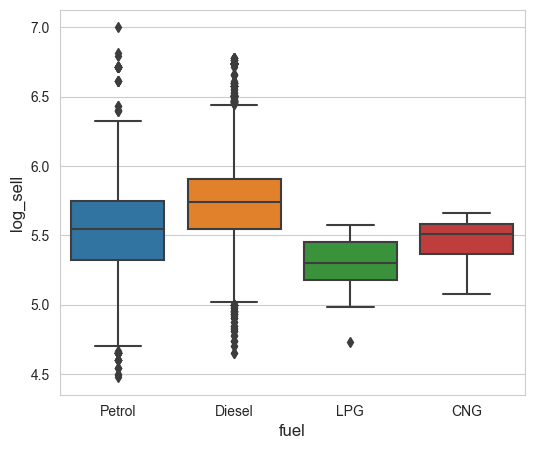

In [12]:
## Boxplot for fuel
plt.figure(figsize=(6,5))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'fuel')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("fuel", fontsize=12)

plt.show()

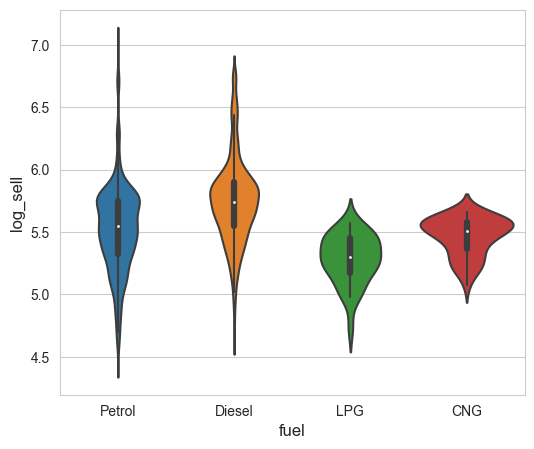

In [13]:
## violinplot for fuel
plt.figure(figsize=(6,5))

sns.violinplot(data = cars_train,
               y = 'log_sell',
               x = 'fuel')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("fuel", fontsize=12)

plt.show()

##### Sample Solution

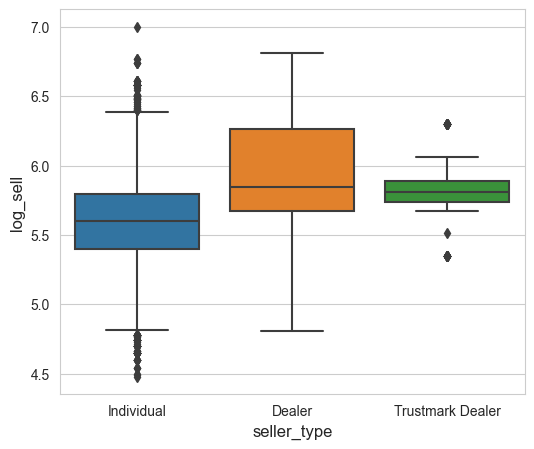

In [14]:
## Boxplot for seller_type
plt.figure(figsize=(6,5))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'seller_type')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("seller_type", fontsize=12)

plt.show()

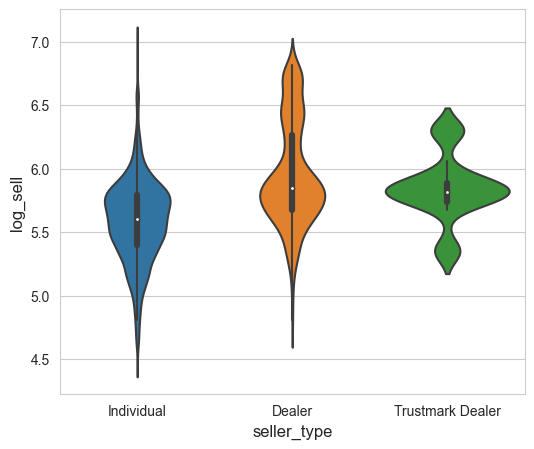

In [15]:
## violinplot for seller_type
plt.figure(figsize=(6,5))

sns.violinplot(data = cars_train,
               y = 'log_sell',
               x = 'seller_type')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("seller_type", fontsize=12)

plt.show()

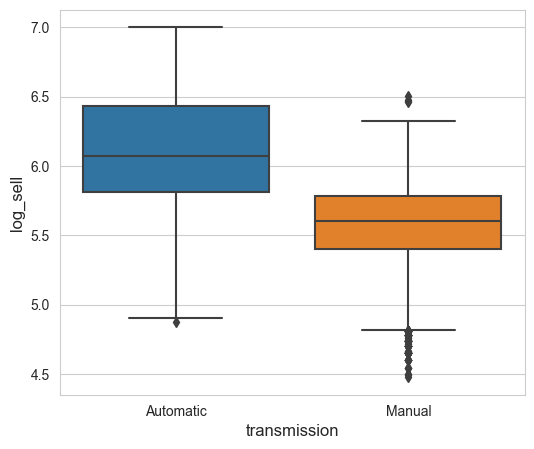

In [16]:
## Boxplot for transmission
plt.figure(figsize=(6,5))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'transmission')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("transmission", fontsize=12)

plt.show()

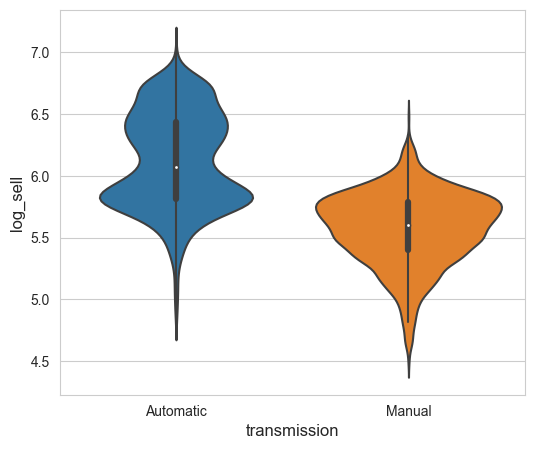

In [17]:
## violinplot for transmission
plt.figure(figsize=(6,5))

sns.violinplot(data = cars_train,
               y = 'log_sell',
               x = 'transmission')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("transmission", fontsize=12)

plt.show()

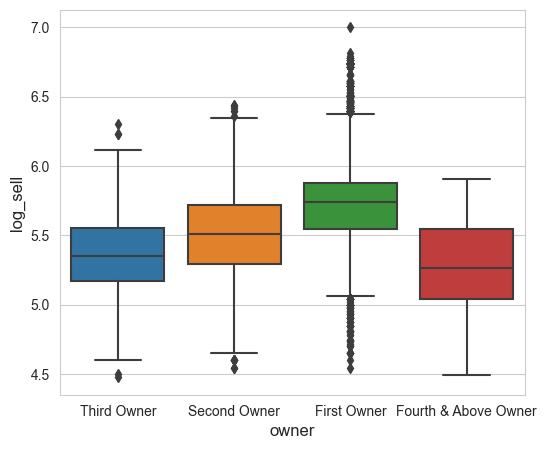

In [18]:
## Boxplot for owner
plt.figure(figsize=(6,5))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'owner')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("owner", fontsize=12)

plt.show()

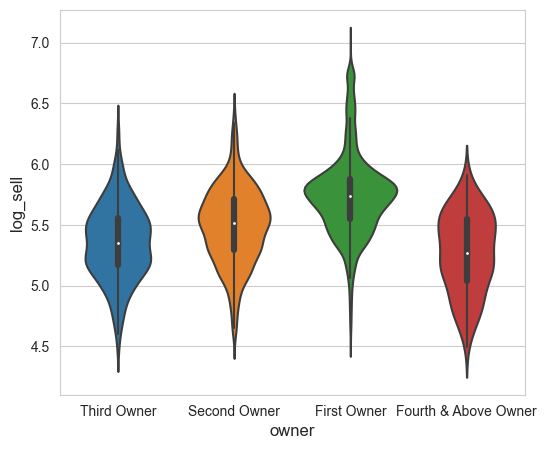

In [19]:
## violinplot for owner
plt.figure(figsize=(6,5))

sns.violinplot(data = cars_train,
               y = 'log_sell',
               x = 'owner')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("owner", fontsize=12)

plt.show()

##### c.

Write down any thoughts you have about potentially important categorical variables from your investigations in <i>a.</i> and <i>b.</i> here.

##### Sample Solution

- `transmission` type seems to impact the selling price of a vehicle, in particular manual transmissions appear to have a lower selling price than automatics
- `seller_type` seems to have an impact between "dealer" and "non-dealer"
- `fuel` seems like a less important variable
- `owner` seems to have some effect on the selling price of a vehicle.

##### d.

From your investigations above you likely noticed that there does seem to be a difference in selling price between vehicles sold by an individual and those sold by some kind of dealer, but the kind of dealer does not seem to matter.

Create a new column in the data set called `dealer` that is `1` if the `seller_type` is a kind of dealership and `0` otherwise.

##### Sample Solution

In [20]:
cars_train['dealer'] = 1
cars_train.loc[cars_train.seller_type == 'Individual', 'dealer'] = 0

In [21]:
cars_train.dealer.value_counts()

0    5252
1    1072
Name: dealer, dtype: int64

##### e.

It appears that different `owner` categories lead to different selling prices. However, it is difficult to tell if this variable is capturing a new signal, or is just reflecting a possible relationship between selling price and the age of the vehicle.

To see what is meant by this statement make a box and whisker plot with `age` on the vertical axis and `owner` on the horizontal. Then make a column called `owner_number` that is `1` when `owner` is `"First Owner"`, is `2` when `owner` is `"Second Owner"` and so on. Calculate the Pearson correlation between `age` and `owner_number`.

##### Sample Solution

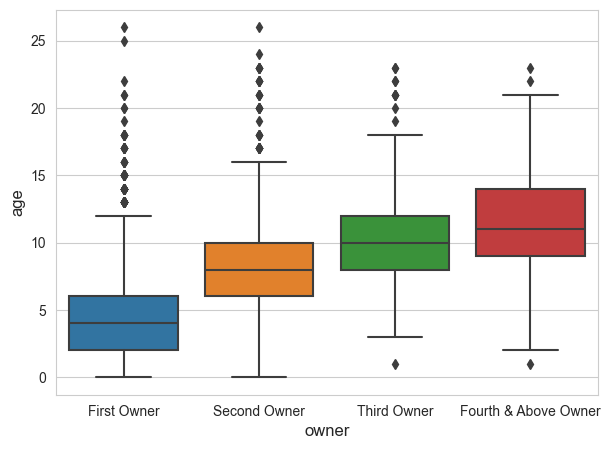

In [22]:
## Boxplot for owner
plt.figure(figsize=(7,5))

sns.boxplot(data = cars_train,
               y = 'age',
               x = 'owner',
               order = ['First Owner', 'Second Owner',
                           'Third Owner', 'Fourth & Above Owner'])

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("age", fontsize=12)
plt.xlabel("owner", fontsize=12)

plt.show()

In [23]:
cars_train['owner_number'] = 1
cars_train.loc[cars_train.owner=='Second Owner', 'owner_number'] = 2
cars_train.loc[cars_train.owner=='Third Owner', 'owner_number'] = 3
cars_train.loc[cars_train.owner=='Fourth & Above Owner', 'owner_number'] = 4 

In [24]:
cars_train[['owner_number', 'age']].corr()

,owner_number,age
owner_number,1.000000,0.512062
age,0.512062,1.000000


The takeaway here is that there is a fair amount of correlation between the age of a vehicle and the number of owners the vehicle has had. From the previous notebook we already know that `log_sell` and `age` have a pretty strong correlation, so it makes sense that `owner` and `log_sell` would also be correlated.


From a predictive modeling sense this means that including `owner` as a categorical feature in a model that also includes `age` may not lead to as huge an improvement to the model as we originally thought.

#### 3. Selecting categorical variables to consider

##### a. 

Using your work in 2. choose some combination of the four categorical variables to add to this model:

$$
\log \left( \text{Selling Price} \right) = \beta_0 + \beta_1 \text{Age} + \epsilon
$$

##### Sample Solution

I think we should consider including `transmission`, our newly made `dealer` variable and `owner`.

##### b.

Make any dummy variables you need given the categories you chose in 3 <i>a.</i>

##### Sample Solution

I do not need to make one for `dealer`, I need to make some for `transmission` and `owner`.

In [25]:
cars_train['automatic'] = 1
cars_train.loc[cars_train.transmission=='Manual', 'automatic'] = 0

In [26]:
cars_train['first_owner'] = pd.get_dummies(cars_train['owner'])['First Owner']
cars_train['second_owner'] = pd.get_dummies(cars_train['owner'])['Second Owner']
cars_train['third_owner'] = pd.get_dummies(cars_train['owner'])['Third Owner']

#### 4. Comparing models

##### a.

Write out the model(s) you will compare to:

$$
\log \left( \text{Selling Price} \right) = \beta_0 + \beta_1 \text{Age} + \epsilon
$$

using cross-validation below.

##### Sample Solution

$$
\log \left( \text{Selling Price} \right) = \beta_0 + \beta_1 \text{Age} + \beta_2 \text{Dealer} + \beta_3 \text{Automatic} + \epsilon
$$

<br>

$$
\log \left( \text{Selling Price} \right) = \beta_0 + \beta_1 \text{Age} + \beta_2 \text{Dealer} + \beta_3 \text{Automatic} + \beta_4 \text{First Owner} + \beta_5 \text{Second Owner} + \beta_6 \text{Third Owner} + \epsilon
$$

##### b.

Fill in the missing code below to perform 5-fold cross-validation to compare all of the models from 4. <i>a.</i>.

In [27]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
model_1_features = ['age']
model_2_features = ['age', 'dealer', 'automatic']
model_3_features = ['age', 'dealer', 'automatic', 'first_owner', 'second_owner', 'third_owner']

In [29]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(5,
              random_state = 614,
              shuffle=True)




## This array will hold the mse for each model and split
mses = np.zeros((3, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(cars_train):
    ## cv training set
    cars_tt = cars_train.iloc[train_index]
    
    ## cv holdout set
    cars_ho = cars_train.iloc[test_index]
    
    ### Model 1 ###
    reg = LinearRegression(copy_X = True)
    
    reg.fit(cars_tt[model_1_features].values.reshape(-1,1),
               cars_tt.log_sell.values)
    
    pred1 = reg.predict(cars_ho[model_1_features].values.reshape(-1,1))
    
    mses[0,i] = mean_squared_error(cars_ho.log_sell.values, pred1)
    
    ### Model 2 ###
    reg = LinearRegression(copy_X = True)
    
    reg.fit(cars_tt[model_2_features].values,
               cars_tt.log_sell.values)
    
    pred2 = reg.predict(cars_ho[model_2_features].values)
    
    mses[1,i] = mean_squared_error(cars_ho.log_sell.values, pred2)
    
    
    ### Model 3 ###
    reg = LinearRegression(copy_X = True)
    
    reg.fit(cars_tt[model_3_features].values,
               cars_tt.log_sell.values)
    
    pred3 = reg.predict(cars_ho[model_3_features].values)
    
    mses[2,i] = mean_squared_error(cars_ho.log_sell.values, pred3)
    
    i = i + 1

In [30]:
mses

array([[0.06633877, 0.06604438, 0.06826445, 0.06967639, 0.05896725],
       [0.0498309 , 0.04885311, 0.04940299, 0.05237303, 0.04612785],
       [0.04987099, 0.0488473 , 0.04944231, 0.05263499, 0.04606081]])

In [31]:
np.mean(mses, axis=1)

array([0.06585825, 0.04931758, 0.04937128])

##### c. 

Recall that we ultimately care about predicting the final selling price, not the logarithm of the final selling price. Copy and paste your cross-validation code and alter it slightly so that you compare the prediction of:

$$
10^{\log (\text{Selling Price})}
$$

to the actual selling price. Look at the root mean squared error which is in the original units of `selling_price`.

##### Sample Solution

In [32]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(5,
              random_state = 614,
              shuffle=True)




## This array will hold the mse for each model and split
mses = np.zeros((3, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(cars_train):
    ## cv training set
    cars_tt = cars_train.iloc[train_index]
    
    ## cv holdout set
    cars_ho = cars_train.iloc[test_index]
    
    ### Model 1 ###
    reg = LinearRegression(copy_X = True)
    
    reg.fit(cars_tt[model_1_features].values.reshape(-1,1),
               cars_tt.log_sell.values)
    
    pred1 = np.power(10, reg.predict(cars_ho[model_1_features].values.reshape(-1,1)))
    
    mses[0,i] = mean_squared_error(cars_ho.selling_price.values, pred1)
    
    ### Model 2 ###
    reg = LinearRegression(copy_X = True)
    
    reg.fit(cars_tt[model_2_features].values,
               cars_tt.log_sell.values)
    
    pred2 = np.power(10, reg.predict(cars_ho[model_2_features].values))
    
    mses[1,i] = mean_squared_error(cars_ho.selling_price.values, pred2)
    
    
    ### Model 3 ###
    reg = LinearRegression(copy_X = True)
    
    reg.fit(cars_tt[model_3_features].values,
               cars_tt.log_sell.values)
    
    pred3 = np.power(10, reg.predict(cars_ho[model_3_features].values))
    
    mses[2,i] = mean_squared_error(cars_ho.selling_price.values, pred3)
    
    i = i + 1

In [33]:
np.mean(np.sqrt(mses), axis=1)

array([742758.59694492, 601099.63286673, 601474.64203789])

##### d.

What do you think about these model performances? Do you think these models are good?

##### Write your thoughts here




##### e.

What do else do you think could be done to improve model performance?

##### Write your thoughts here




##### f.

If you have time you can use this space to try additional models.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)